# Stochastic Analysis

## load tables

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [56]:
agents_number_df = pd.read_csv('./agents_results.csv')
agents_number_df = agents_number_df.drop_duplicates(subset='damage')
agents_number_df = agents_number_df.loc[(agents_number_df['num_agents'] <= 500) & (agents_number_df['d'] == 5) & (agents_number_df['sigma'] == 1) & (agents_number_df['f'] == 1.5)]
agents_number_df = agents_number_df.groupby(['planner', 'num_agents'], as_index=False).mean()
agents_number_df.head()

,planner,num_agents,num_robots,f,d,sigma,active_time,planner_time,damage,num_disabled
0,StochasticIterativePlanner,50,5.0,1.5,5.0,1.0,217.850869,0.369549,9859.710593,15.8008
1,StochasticIterativePlanner,100,5.0,1.5,5.0,1.0,227.112760,0.434708,20019.998530,29.0812
2,StochasticIterativePlanner,200,5.0,1.5,5.0,1.0,239.503755,1.133050,41498.873041,49.4458
3,StochasticIterativePlanner,300,5.0,1.5,5.0,1.0,245.728732,2.253198,63730.420573,65.3150
4,StochasticIterativePlanner,400,5.0,1.5,5.0,1.0,251.699382,3.459262,86020.206699,79.0442


In [57]:
f_df = pd.read_csv('./f_results.csv')
f_df = f_df.drop_duplicates(subset='damage')
f_df = f_df.loc[(f_df['num_agents'] == 300) & (f_df['f'] < 2.1)]
f_df = f_df.groupby(['planner', 'f'], as_index=False).mean()
f_df.head()

,planner,f,num_agents,num_robots,d,sigma,active_time,planner_time,damage,num_disabled
0,StochasticIterativePlanner,1.1,300.0,5.0,5.0,1.0,284.145790,0.944603,73015.404814,14.4760
1,StochasticIterativePlanner,1.2,300.0,5.0,5.0,1.0,274.548733,1.176596,70373.099547,29.3392
2,StochasticIterativePlanner,1.3,300.0,5.0,5.0,1.0,260.944014,1.578389,67969.607206,41.9170
3,StochasticIterativePlanner,1.4,300.0,5.0,5.0,1.0,258.105997,2.081960,65856.942674,53.5702
4,StochasticIterativePlanner,1.5,300.0,5.0,5.0,1.0,245.728732,2.243365,63730.420573,65.3150


In [58]:
robots_df = pd.read_csv('./robots_results.csv')
robots_df = robots_df.drop_duplicates(subset=['planner', 'damage'])
robots_df = robots_df.loc[(robots_df['f'] == 1.5)]
robots_df = robots_df.groupby(['planner', 'num_robots'], as_index=False).mean()
robots_df.head()

,planner,num_robots,num_agents,f,d,sigma,active_time,planner_time,damage,num_disabled
0,StochasticIterativePlanner,2,300.0,1.5,5.0,1.0,275.186345,1.522294,69089.898709,32.955
1,StochasticIterativePlanner,3,300.0,1.5,5.0,1.0,267.540872,1.779477,66925.894794,45.299
2,StochasticIterativePlanner,4,300.0,1.5,5.0,1.0,261.242169,2.176842,65393.962320,55.648
3,StochasticIterativePlanner,5,300.0,1.5,5.0,1.0,240.216426,2.362805,64004.893196,63.306
4,StochasticIterativePlanner,6,300.0,1.5,5.0,1.0,240.647679,2.687860,62082.478940,72.664


## visualizations

In [59]:
planners_colors = {'StochasticIterativePlanner': 'red',
                   'StochasticStaticLackPlanner': 'blue',
                   'StochasticAdditiveLackPlanner': 'orange',
                   'StochasticMonotone15LackPlanner': 'green',
                   'StochasticMonotone20LackPlanner': 'purple',
                   'StochasticMonotone30LackPlanner': 'olive',
                   'StochasticMonotone45LackPlanner': 'cyan'}

In [60]:
from typing import List

def visualize(X: List[str], Y: List[str], data, file_to_save: str, title: str):
    plt.figure(figsize=(14,10))
    plt.suptitle(title, fontsize=18)

    for i in range(len(Y)):
        x, y = X[i], Y[i]

        plt.subplot(2, 2, i+1)
        plt.xlabel(x)
        plt.ylabel(y)
        for j in range(len(data)):
            r = data[j]
            plt.plot(list(r[x]), list(r[y]), c=list(planners_colors.values())[j])

        if i==1:
            plt.legend(planners_colors.keys(), fontsize='14')

    plt.savefig(file_to_save)
    plt.show()

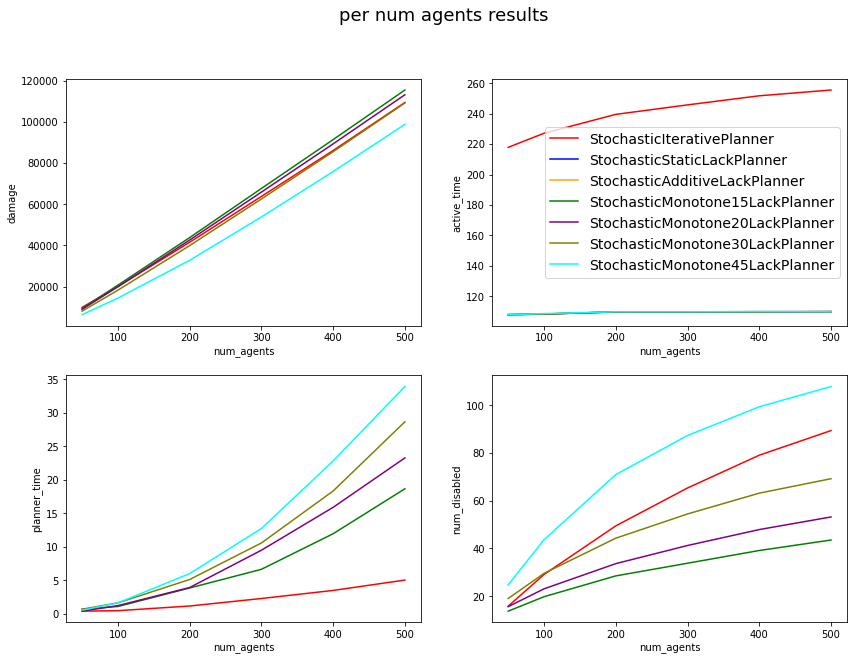

In [61]:
Y = ['damage', 'active_time', 'planner_time', 'num_disabled']
X = ['num_agents' for _ in Y]

agents_results = [agents_number_df.loc[agents_number_df['planner'] == name] for name in planners_colors.keys()]
title = 'per num agents results'
file_to_save = './plots/stochastic_num_agents.png'

visualize(X, Y, agents_results, file_to_save, title)

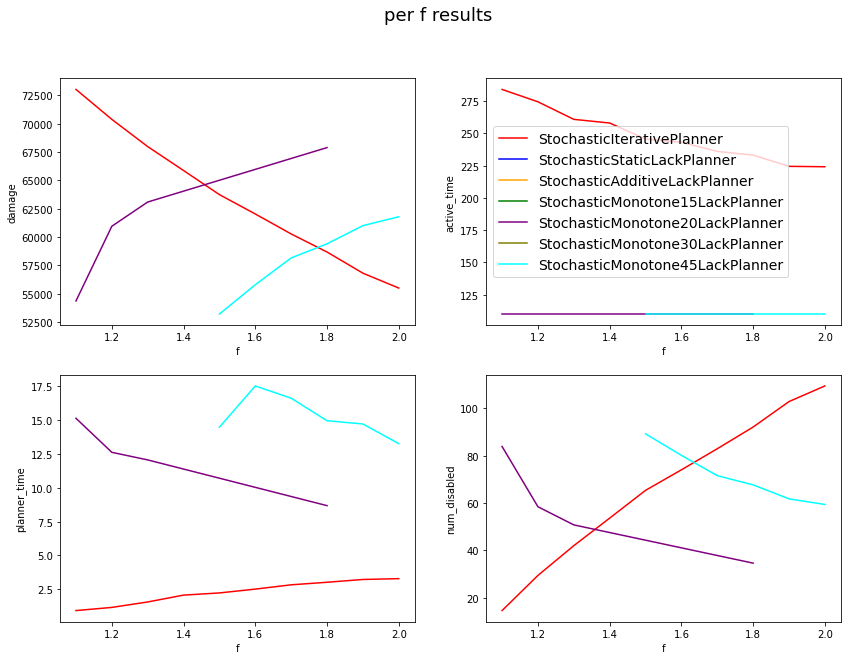

In [62]:
Y = ['damage', 'active_time', 'planner_time', 'num_disabled']
X = ['f' for _ in Y]

f_results = [f_df.loc[f_df['planner'] == name] for name in planners_colors.keys()]
title = 'per f results'
file_to_save = './plots/stochastic_f.png'

visualize(X, Y, f_results, file_to_save, title)

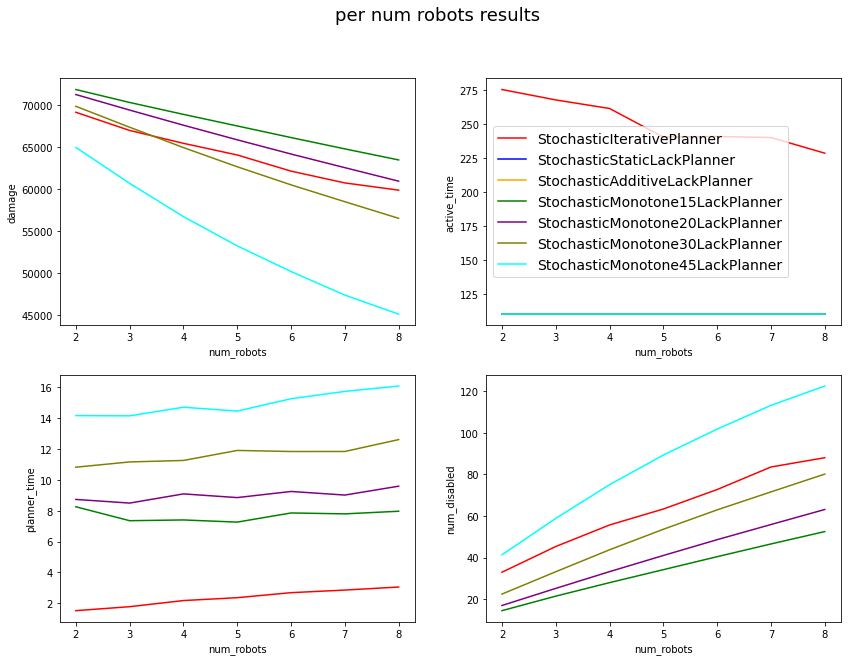

In [63]:
Y = ['damage', 'active_time', 'planner_time', 'num_disabled']
X = ['num_robots' for _ in Y]

robots_results = [robots_df.loc[robots_df['planner'] == name] for name in planners_colors.keys()]
title = 'per num robots results'
file_to_save = './plots/stochastic_num_robots.png'

visualize(X, Y, robots_results, file_to_save, title)

## run experiments

### config file

In [43]:
import json
with open('config.json') as json_file:
    config = json.load(json_file)
config

{'x_size': 100,
 'y_size_init': 100,
 'y_size': 300,
 'x_buffer': 10,
 'y_buffer': 10,
 'num_robots': 5,
 'num_agents': 100,
 'agent_speed': 1,
 'robot_speed': 1.5,
 'disablement_range': 5,
 'sigma': 1}

In [41]:
import math
import time
from random import seed

from planners.stochastic.baseline.stochastic_iterative_planner import StochasticIterativePlanner
from planners.stochastic.partial_blockage.stochastic_additive_lack_planner import StochasticAdditiveLackPlanner
from planners.stochastic.partial_blockage.stochastic_monotone_lack_planner import StochasticMonotoneLackPlanner
from world.agents.stochastic_agent import StochasticAgent
from world.robots.timing_robot import TimingRobot
from world.stochastic_environment import StochasticEnvironment
from planners.planner import Planner
from planners.stochastic.partial_blockage.stochastic_static_lack_planner import StochasticStaticLackPlanner
from utils.functions import *

In [42]:
def run(planner: Planner, file_name: str):
    agents = [StochasticAgent(loc=sample_point(config['x_buffer'], config['x_buffer'] + config['x_size'],
                                               config['y_buffer'], config['y_buffer'] + config['y_size_init'], True),
                              v=config['agent_speed'], sigma=config['sigma']) for _ in range(config['num_agents'])]

    robots = [BasicRobot(sample_point(0, config['x_size'] + 2 * config['x_buffer'], 0, config['y_buffer'], True),
                         config['robot_speed'], config['disablement_range']) for _ in range(config['num_robots'])]

    env = StochasticEnvironment(agents=agents, robots=robots, top_border=config['y_size'] + config['y_buffer'],
                                right_border=config['x_size'] + config['x_buffer'], left_border=config['x_buffer'])

    before = time.time()
    _, active_time, expected_damage, expected_num_disabled = planner.plan(env)
    planning_time = time.time() - before

    write_report(planner=str(planner),
                 num_agents=config['num_agents'],
                 num_robots=config['num_robots'],
                 f=config['robot_speed'] / config['agent_speed'],
                 d=config['disablement_range'],
                 active_or_copmletion_time=active_time,
                 planner_time=planning_time,
                 damage=expected_damage,
                 num_disabled=expected_num_disabled,
                 file_name=file_name,
                 is_active_time=True,
                 sigma=config['sigma'])

In [13]:
planners = [StochasticMonotoneLackPlanner(), StochasticStaticLackPlanner(), StochasticAdditiveLackPlanner()]

for planner in planners:
    for alpha in [math.pi / 4]:
        planner.alpha = alpha
        for v in tqdm([100, 200, 300, 400, 500]):
            print(f'*** *** v={v} *** ***')
            for s in range(1):
                seed(s)

                config['num_agents'] = v
                print(f'running {str(planner)} with seed {s}..')
                run(planner, 'agents_results.csv')

  0%|          | 0/5 [00:00<?, ?it/s]

*** *** v=100 *** ***
running StochasticMonotone45LackPlanner with seed 0..


 20%|██        | 1/5 [00:01<00:07,  1.95s/it]

*** *** v=200 *** ***
running StochasticMonotone45LackPlanner with seed 0..


 40%|████      | 2/5 [00:08<00:14,  4.86s/it]

*** *** v=300 *** ***
running StochasticMonotone45LackPlanner with seed 0..


 60%|██████    | 3/5 [00:23<00:18,  9.29s/it]

*** *** v=400 *** ***
running StochasticMonotone45LackPlanner with seed 0..


 80%|████████  | 4/5 [00:49<00:15, 15.75s/it]

*** *** v=500 *** ***
running StochasticMonotone45LackPlanner with seed 0..


  0%|          | 0/5 [00:00<?, ?it/s]

*** *** v=100 *** ***
running StochasticStaticLackPlanner with seed 0..


  0%|          | 0/5 [00:29<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# planners = [StochasticMonotoneLackPlanner(), StochasticIterativePlanner(), StochasticStaticLackPlanner(),
#             StochasticAdditiveLackPlanner()]
planners = [StochasticMonotoneLackPlanner()]

config['num_agents'] = 300

for planner in planners:
    for alpha in [math.pi / 3, math.pi / 4, math.pi / 6, math.pi / 9, math.pi / 12]:
        planner.alpha = alpha
        for v in tqdm([1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]):
            print(f'*** *** v={v} *** ***')
            for s in range(30):
                seed(s)

                config['robot_speed'] = v
                print(f'running {str(planner)} with seed {s}..')
                try:
                    run(planner, 'f_results.csv')
                except:
                    pass

 20%|██        | 2/10 [00:00<00:00, 18.81it/s]

*** *** v=1.1 *** ***
running StochasticMonotone60LackPlanner with seed 0..
running StochasticMonotone60LackPlanner with seed 1..
running StochasticMonotone60LackPlanner with seed 2..
running StochasticMonotone60LackPlanner with seed 3..
running StochasticMonotone60LackPlanner with seed 4..
running StochasticMonotone60LackPlanner with seed 5..
running StochasticMonotone60LackPlanner with seed 6..
running StochasticMonotone60LackPlanner with seed 7..
running StochasticMonotone60LackPlanner with seed 8..
running StochasticMonotone60LackPlanner with seed 9..
running StochasticMonotone60LackPlanner with seed 10..
running StochasticMonotone60LackPlanner with seed 11..
running StochasticMonotone60LackPlanner with seed 12..
running StochasticMonotone60LackPlanner with seed 13..
running StochasticMonotone60LackPlanner with seed 14..
running StochasticMonotone60LackPlanner with seed 15..
running StochasticMonotone60LackPlanner with seed 16..
running StochasticMonotone60LackPlanner with seed 17.

 80%|████████  | 8/10 [00:00<00:00, 17.46it/s]


running StochasticMonotone60LackPlanner with seed 12..
running StochasticMonotone60LackPlanner with seed 13..
running StochasticMonotone60LackPlanner with seed 14..
running StochasticMonotone60LackPlanner with seed 15..
running StochasticMonotone60LackPlanner with seed 16..
running StochasticMonotone60LackPlanner with seed 17..
running StochasticMonotone60LackPlanner with seed 18..
running StochasticMonotone60LackPlanner with seed 19..
running StochasticMonotone60LackPlanner with seed 20..
running StochasticMonotone60LackPlanner with seed 21..
running StochasticMonotone60LackPlanner with seed 22..
running StochasticMonotone60LackPlanner with seed 23..
running StochasticMonotone60LackPlanner with seed 24..
running StochasticMonotone60LackPlanner with seed 25..
running StochasticMonotone60LackPlanner with seed 26..
running StochasticMonotone60LackPlanner with seed 27..
running StochasticMonotone60LackPlanner with seed 28..
running StochasticMonotone60LackPlanner with seed 29..
*** *** v

 80%|████████  | 8/10 [00:14<00:00, 17.46it/s]

running StochasticMonotone60LackPlanner with seed 1..
running StochasticMonotone60LackPlanner with seed 2..
running StochasticMonotone60LackPlanner with seed 3..
running StochasticMonotone60LackPlanner with seed 4..
running StochasticMonotone60LackPlanner with seed 5..
running StochasticMonotone60LackPlanner with seed 6..
running StochasticMonotone60LackPlanner with seed 7..
running StochasticMonotone60LackPlanner with seed 8..
running StochasticMonotone60LackPlanner with seed 9..
running StochasticMonotone60LackPlanner with seed 10..
running StochasticMonotone60LackPlanner with seed 11..
running StochasticMonotone60LackPlanner with seed 12..
running StochasticMonotone60LackPlanner with seed 13..
running StochasticMonotone60LackPlanner with seed 14..


In [54]:
planners = [StochasticIterativePlanner()]

config['num_agents'] = 300

for planner in planners:
    # for alpha in [math.pi / 4, math.pi / 6, math.pi / 9, math.pi / 12]:
    #     planner.alpha = alpha
    for v in tqdm([2,3,4,5,6,7,8]):
        print(f'*** *** v={v} *** ***')
        for s in range(1):
            seed(s)

            config['num_robots'] = v
            print(f'running {str(planner)} with seed {s}..')
            run(planner, 'robots_results.csv')

  0%|          | 0/7 [00:00<?, ?it/s]

*** *** v=2 *** ***
running StochasticIterativePlanner with seed 0..


 14%|█▍        | 1/7 [00:01<00:09,  1.53s/it]

*** *** v=3 *** ***
running StochasticIterativePlanner with seed 0..


 29%|██▊       | 2/7 [00:03<00:08,  1.68s/it]

*** *** v=4 *** ***
running StochasticIterativePlanner with seed 0..


 43%|████▎     | 3/7 [00:05<00:07,  1.91s/it]

*** *** v=5 *** ***
running StochasticIterativePlanner with seed 0..


 57%|█████▋    | 4/7 [00:07<00:06,  2.09s/it]

*** *** v=6 *** ***
running StochasticIterativePlanner with seed 0..


 71%|███████▏  | 5/7 [00:10<00:04,  2.31s/it]

*** *** v=7 *** ***
running StochasticIterativePlanner with seed 0..


 86%|████████▌ | 6/7 [00:13<00:02,  2.49s/it]

*** *** v=8 *** ***
running StochasticIterativePlanner with seed 0..


100%|██████████| 7/7 [00:16<00:00,  2.35s/it]
